In [1]:
import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv('phivolcs_earthquake_data.csv')

# View first 5 rows
df.head()


,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Specific_Location,General_Location
0,2025-11-09 13:10:00,11.04,124.02,21.0,2.0,004 km East of City Of Bogo (Cebu),City Of Bogo,Cebu
1,2025-11-09 12:53:00,6.43,125.74,9.0,1.7,014 km N 83° E of Malita (Davao Occidental),Malita,Davao Occidental
2,2025-11-09 12:28:00,11.11,124.09,8.0,2.5,014 km N 59° E of City Of Bogo (Cebu),City Of Bogo,Cebu
3,2025-11-09 11:06:00,11.11,124.21,5.0,1.7,026 km N 76° E of City Of Bogo (Cebu),City Of Bogo,Cebu
4,2025-11-09 09:57:00,10.88,123.81,2.0,2.2,027 km S 41° W of City Of Bogo (Cebu),City Of Bogo,Cebu


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116862 entries, 0 to 116861
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_Time_PH       116862 non-null  object 
 1   Latitude           116838 non-null  float64
 2   Longitude          116838 non-null  float64
 3   Depth_In_Km        116861 non-null  object 
 4   Magnitude          116862 non-null  float64
 5   Location           116862 non-null  object 
 6   Specific_Location  116862 non-null  object 
 7   General_Location   116862 non-null  object 
dtypes: float64(3), object(5)
memory usage: 7.1+ MB


In [3]:
# Convert Date_Time_PH column to datetime (if not already)
df['Date_Time_PH'] = pd.to_datetime(df['Date_Time_PH'])

# Create a new column with just the date
df['Date'] = df['Date_Time_PH'].dt.date

# Display first few rows to confirm
df.head()


,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Specific_Location,General_Location,Date
0,2025-11-09 13:10:00,11.04,124.02,21.0,2.0,004 km East of City Of Bogo (Cebu),City Of Bogo,Cebu,2025-11-09
1,2025-11-09 12:53:00,6.43,125.74,9.0,1.7,014 km N 83° E of Malita (Davao Occidental),Malita,Davao Occidental,2025-11-09
2,2025-11-09 12:28:00,11.11,124.09,8.0,2.5,014 km N 59° E of City Of Bogo (Cebu),City Of Bogo,Cebu,2025-11-09
3,2025-11-09 11:06:00,11.11,124.21,5.0,1.7,026 km N 76° E of City Of Bogo (Cebu),City Of Bogo,Cebu,2025-11-09
4,2025-11-09 09:57:00,10.88,123.81,2.0,2.2,027 km S 41° W of City Of Bogo (Cebu),City Of Bogo,Cebu,2025-11-09


In [4]:
# Define bins and labels based on magnitude scale
bins = [0, 5, 5.9, 6.9, float('inf')]
labels = ['minor', 'moderate', 'strong', 'major']

# Create a new column 'Magnitude_Class'
df['Magnitude_Class'] = pd.cut(df['Magnitude'], bins=bins, labels=labels, right=True)

# Show sample
df[['Magnitude', 'Magnitude_Class']].head()


,Magnitude,Magnitude_Class
0,2.0,minor
1,1.7,minor
2,2.5,minor
3,1.7,minor
4,2.2,minor


In [5]:
#Duplicates were observed in the file
df = df.drop_duplicates(subset=['Date_Time_PH', 'Latitude', 'Longitude', 'Magnitude'], keep='last')
df = df.reset_index(drop=True)

<Axes: title={'center': 'Earthquakes Reported per Year'}, xlabel='Year'>

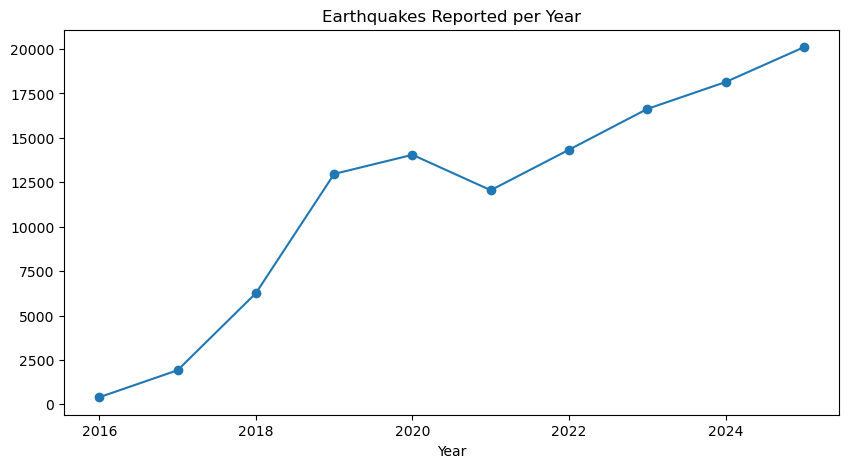

In [6]:
import matplotlib.pyplot as plt

df['Year'] = df['Date_Time_PH'].dt.year

reported_per_year = df.groupby('Year').size()
reported_per_year.plot(kind='line', marker='o', figsize=(10,5), title='Earthquakes Reported per Year')

#### Observation
The data prior to 2019 look suspicious, may be attributed to data collection
So will limit the analysis  to the last 7 years

In [7]:
# Drop data prior to 2019, we will still have 7 years worth of data 

# Ensure datetime format
df['Date_Time_PH'] = pd.to_datetime(df['Date_Time_PH'])

# Filter to keep only 2018 and later
df = df[df['Date_Time_PH'].dt.year >= 2018]

# Reset index (optional but tidy)
df = df.reset_index(drop=True)


In [8]:
# Calculate average number of Quakes reported per day


# Extract date only (remove time)
df['Date'] = df['Date_Time_PH'].dt.date

# Count earthquakes per day
quakes_per_day = df.groupby('Date').size()

# Calculate average earthquakes per day
avg_quakes_per_day = quakes_per_day.mean()

print(f"Average earthquakes reported per day: {avg_quakes_per_day:.2f}")


Average earthquakes reported per day: 39.91


In [9]:
# Identify "hot spots" - Get quakes reported by location

# total quakes by location
total_by_location = df.groupby('General_Location').size().reset_index(name='Total_Quakes')

# strong/major quakes (>=6.0)
big_by_location = df[df['Magnitude'] >= 6.0].groupby('General_Location').size().reset_index(name='Big_Quakes')

# merge into one table
quake_counts = total_by_location.merge(big_by_location, on='General_Location', how='left')

# replace NaN big quake counts with 0
quake_counts['Big_Quakes'] = quake_counts['Big_Quakes'].fillna(0)

quake_counts

,General_Location,Total_Quakes,Big_Quakes
0,Abra,2859,2.0
1,Agusan Del Norte,688,0.0
2,Agusan Del Sur,1607,0.0
3,Agusan del Norte,20,0.0
4,Agusan del Sur,16,0.0
...,...,...,...
130,Zamboanga Del Norte,1035,0.0
131,Zamboanga Del Sur,492,0.0
132,Zamboanga Sibugay,148,0.0
133,Zamboanga del Norte,12,0.0


In [10]:
# Install if not already installed
%pip install geopandas geodatasets

Note: you may need to restart the kernel to use updated packages.


/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_8649/255673697.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for mag_class, subset in df.groupby('Magnitude_Class'):


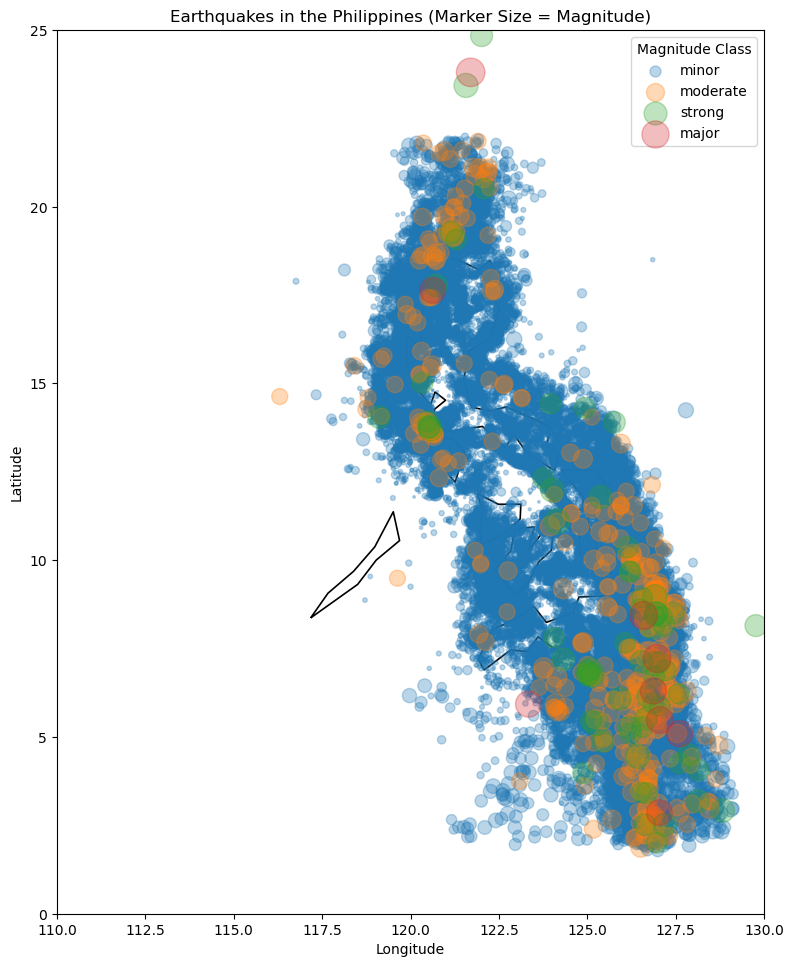

In [11]:
# Plot reported quakes over the Philippine Map

import geopandas as gpd
import numpy as np

# Use a direct URL to Natural Earth data instead of geodatasets
# This is the correct path to the Natural Earth countries dataset
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

# Load global boundaries and extract Philippines
ph = world[world['NAME'] == 'Philippines'].to_crs(epsg=4326)

# Create a sample dataframe for earthquakes 
dfA = gpd.GeoDataFrame({
    'Longitude': [120.5, 121.0, 122.5, 123.8, 125.0],
    'Latitude': [14.5, 13.0, 11.2, 13.5, 10.0],
    'Magnitude': [5.2, 4.5, 6.1, 5.8, 4.9]
})

# Create magnitude class for grouping
dfA['Magnitude_Class'] = pd.cut(
    df['Magnitude'], 
    bins=[0, 4.0, 5.0, 6.0, 10.0], 
    labels=['Minor', 'Moderate', 'Strong', 'Major']
)

# Scale marker size by magnitude
df['marker_size'] = (df['Magnitude'] ** 3)  # cubic highlights big quakes

# Plot
fig, ax = plt.subplots(figsize=(8,10))
ph.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2, zorder=1)

# Plot each magnitude class in different color, size scaled
for mag_class, subset in df.groupby('Magnitude_Class'):
    ax.scatter(
        subset['Longitude'], subset['Latitude'],
        s=subset['marker_size'],
        alpha=0.3,
        label=mag_class,
        zorder=2
    )

# Set display range to focus area (PH region)
ax.set_xlim(110, 130)
ax.set_ylim(0, 25)
ax.set_aspect('equal', adjustable='box')

ax.set_title("Earthquakes in the Philippines (Marker Size = Magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Magnitude Class")

plt.tight_layout()
plt.savefig("quakes_by_mag_plot.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_8649/2610583608.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_minor['marker_size'] = (df_no_minor['Magnitude'] ** 3)  # cubic highlights big quakes
/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_8649/2610583608.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for mag_class, subset in df_no_minor.groupby('Magnitude_Class'):


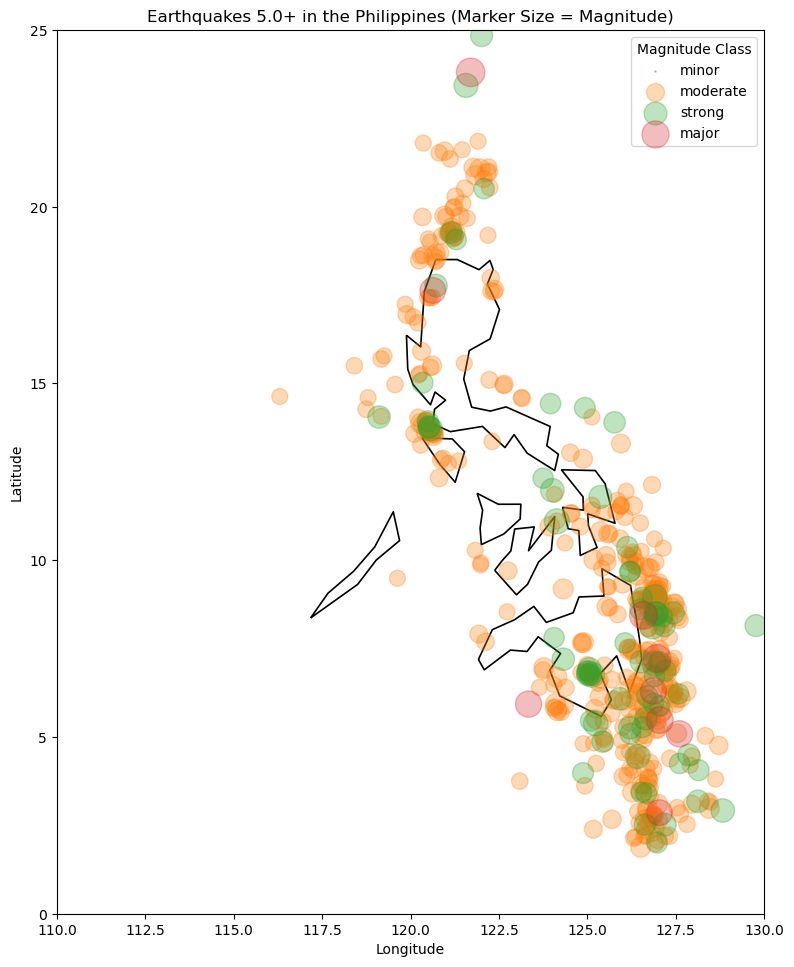

In [12]:
# Create second map but exclude minor quakes
# Load global boundaries and extract Philippines
ph = world[world['NAME'] == 'Philippines'].to_crs(epsg=4326)

# Create a sample dataframe for earthquakes 
dfB = gpd.GeoDataFrame({
    'Longitude': [120.5, 121.0, 122.5, 123.8, 125.0],
    'Latitude': [14.5, 13.0, 11.2, 13.5, 10.0],
    'Magnitude': [5.2, 4.5, 6.1, 5.8, 4.9]
})

# Create magnitude class for grouping
dfB['Magnitude_Class'] = pd.cut(
    df['Magnitude'], 
    bins=[0, 4.0, 5.0, 6.0, 10.0], 
    labels=['Minor', 'Moderate', 'Strong', 'Major']
)

# Filter out minor quakes
df_no_minor = df[df['Magnitude_Class'] != 'minor']

# Scale marker size by magnitude
df_no_minor['marker_size'] = (df_no_minor['Magnitude'] ** 3)  # cubic highlights big quakes

# Plot
fig, ax = plt.subplots(figsize=(8,10))
ph.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2, zorder=1)

# Plot each magnitude class in different color, size scaled
for mag_class, subset in df_no_minor.groupby('Magnitude_Class'):
    ax.scatter(
        subset['Longitude'], subset['Latitude'],
        s=subset['marker_size'],
        alpha=0.3,
        label=mag_class,
        zorder=2
    )

# Set display range to focus area (PH region)
ax.set_xlim(110, 130)
ax.set_ylim(0, 25)
ax.set_aspect('equal', adjustable='box')

ax.set_title("Earthquakes 5.0+ in the Philippines (Marker Size = Magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(title="Magnitude Class")

plt.tight_layout()
plt.savefig("quakes_no_minor.png", dpi=300, bbox_inches='tight')
plt.show()

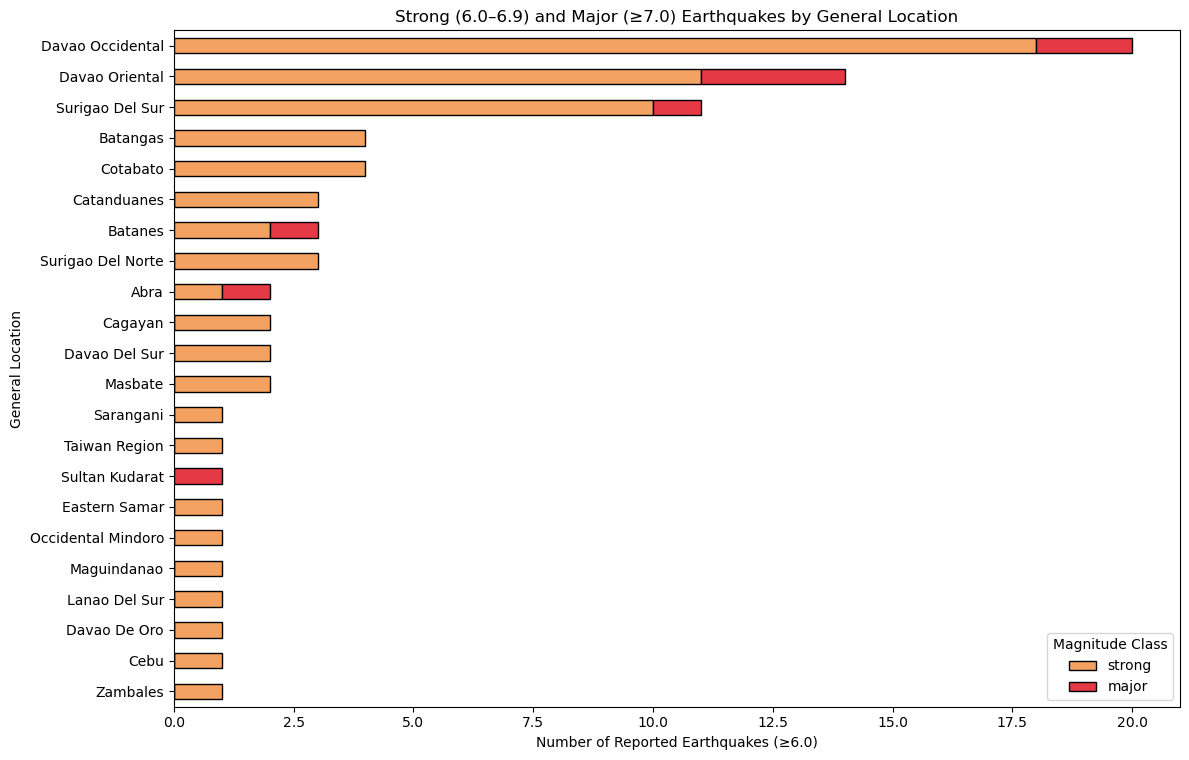

In [13]:
# Identify hot spots

# Filter strong/major earthquakes (>= 6.0)
big_quakes = df[df['Magnitude'] >= 6.0].copy()

# Bin into strong vs major
big_quakes['MagBin'] = np.where(big_quakes['Magnitude'] >= 7.0, 'major', 'strong')

# Count by General_Location x MagBin
counts = (big_quakes
          .groupby(['General_Location', 'MagBin'])
          .size()
          .unstack(fill_value=0)
          .reindex(columns=['strong', 'major'], fill_value=0))

# Rank by total big quakes
counts['Total'] = counts['strong'] + counts['major']
counts = counts.sort_values('Total', ascending=False)

# (Optional) keep top N:
# counts = counts.head(25)

# Plot stacked horizontal bars
ax = counts[['strong','major']].plot(
    kind='barh',
    stacked=True,
    edgecolor='black',
    figsize=(12, max(6, 0.35*len(counts))),
    color={'strong':'#f4a261', 'major':'#e63946'}  # optional colors
)

ax.set_title("Strong (6.0–6.9) and Major (≥7.0) Earthquakes by General Location")
ax.set_xlabel("Number of Reported Earthquakes (≥6.0)")
ax.set_ylabel("General Location")
ax.invert_yaxis()  # largest at top (since we sorted descending)
ax.legend(title="Magnitude Class", loc='lower right')

plt.tight_layout()
plt.savefig("biqquakes_location.png", dpi=300, bbox_inches='tight')
plt.show()


## Estimate true number of earthquakes versus reported earthquakes
Looking at the data, it reports earthquates for each location. One earthquake is reported several times - as it is felt in many areas.  Moreover, aftershocks are also reported.  

To estimate the true number of earthquakes, I am extracting the highest magnitude earthquake reported for the day -- and dropping all other earthquakek reporting on that day.  This may be an over simplification, but may suffice for messaging purposes.

In [14]:
# Extract data
df_clean = df.copy()

df_clean['Date_Only'] = df_clean['Date_Time_PH'].dt.date

df_clean = df_clean.sort_values(by='Magnitude', ascending=False)

df_clean = df_clean.drop_duplicates(subset=['Date_Only'], keep='first')

df_clean = df_clean.reset_index(drop=True)

print("Original rows:", len(df))
print("Cleaned rows:", len(df_clean))
print("Duplicates removed:", len(df) - len(df_clean))

Original rows: 114530
Cleaned rows: 2870
Duplicates removed: 111660


In [15]:
# Extract year
df_clean['Year'] = df_clean['Date_Time_PH'].dt.year

# Count earthquakes per year
quakes_per_year = df_clean.groupby('Year').size()

print("Number of earthquakes per year:")
print(quakes_per_year)


Number of earthquakes per year:
Year
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025    313
dtype: int64


/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_8649/3316808353.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no_minor.groupby(['Year', 'Magnitude_Class'])


<Figure size 1200x600 with 0 Axes>

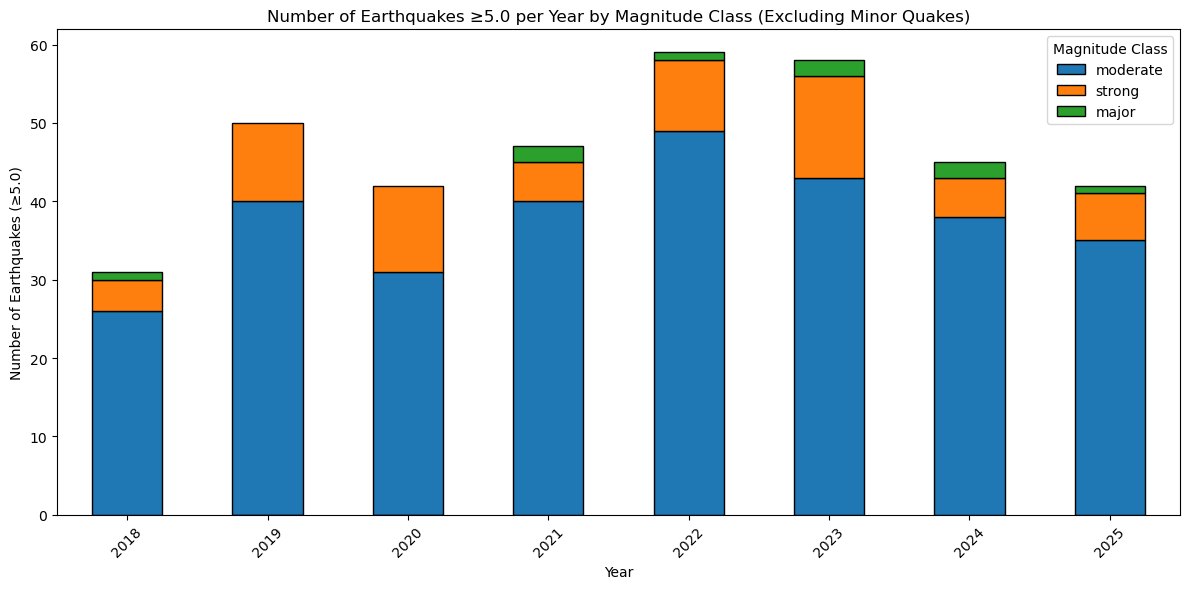

In [16]:
# Show number of moderate, strong, major quakes by year 
# Or Filter out minor earthquakes
df_no_minor = df_clean[df_clean['Magnitude_Class'] != 'minor']

# Group by year + magnitude class
quakes_by_year_mag_no_minor = (
    df_no_minor.groupby(['Year', 'Magnitude_Class'])
    .size()
    .unstack(fill_value=0)
)

# Reorder for logical stacking (optional)
order = ['moderate', 'strong', 'major']
quakes_by_year_mag_no_minor = quakes_by_year_mag_no_minor.reindex(columns=order, fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12,6))
quakes_by_year_mag_no_minor.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    edgecolor='black'
)

plt.title("Number of Earthquakes ≥5.0 per Year by Magnitude Class (Excluding Minor Quakes)")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes (≥5.0)")
plt.xticks(rotation=45)
plt.legend(title="Magnitude Class")
plt.tight_layout()
plt.savefig("yearly_quakes.png", dpi=300, bbox_inches='tight')
plt.show()


In [17]:
# Get counts and averages per year
# Filter strong (6.0–6.9) and major (>=7.0)

# Filter strong (6.0–6.9) and major (>=7.0)
strong = df_clean[(df_clean['Magnitude'] >= 6.0) & (df_clean['Magnitude'] < 7.0)]
major = df_clean[df_clean['Magnitude'] >= 7.0]

# Count per year
strong_per_year = strong.groupby('Year').size()
major_per_year = major.groupby('Year').size()

# Combine into one table
quakes_strong_major = pd.DataFrame({
    'Strong (6.0-6.9)': strong_per_year,
    'Major (>=7.0)': major_per_year
}).fillna(0).astype(int)

print("Total Strong and Major Earthquakes per Year:")
print(quakes_strong_major)

# ----- NEW: Compute averages -----
avg_strong = strong_per_year.mean()
avg_major  = major_per_year.mean()
avg_total_big = (strong_per_year + major_per_year).mean()

print("\nAverage earthquakes per year:")
print(f"Average Strong (6.0–6.9) quakes per year: {avg_strong:.2f}")
print(f"Average Major (>=7.0) quakes per year: {avg_major:.2f}")
print(f"Average Total >=6.0 quakes per year: {avg_total_big:.2f}")


Total Strong and Major Earthquakes per Year:
      Strong (6.0-6.9)  Major (>=7.0)
Year                                 
2018                 4              1
2019                10              0
2020                11              0
2021                 5              2
2022                 9              1
2023                13              2
2024                 5              2
2025                 6              1

Average earthquakes per year:
Average Strong (6.0–6.9) quakes per year: 7.88
Average Major (>=7.0) quakes per year: 1.50
Average Total >=6.0 quakes per year: 8.50


In [18]:
# Get number of days between quakes 6.0+ 

# Filter strong + major quakes (Magnitude >= 6.0)
big_quakes = df_clean[df_clean['Magnitude'] >= 6.0].copy()
big_quakes = big_quakes.sort_values('Date_Time_PH')

# Calculate day differences
big_quakes['days_between'] = big_quakes['Date_Time_PH'].diff().dt.days

# Remove first NaN diff
big_quakes = big_quakes.dropna(subset=['days_between'])

# Average and median days between big quakes
avg_days_big = big_quakes['days_between'].mean()
median_days_big = big_quakes['days_between'].median()

print(f"Average days between strong+major (>=6.0) quakes: {avg_days_big:.2f}")
print(f"Median days between strong+major (>=6.0) quakes: {median_days_big:.2f}")


Average days between strong+major (>=6.0) quakes: 38.25
Median days between strong+major (>=6.0) quakes: 26.00


In [19]:
# Do same math for quakes 7.0+

# Filter major quakes (Magnitude >= 7.0)
major_quakes = df_clean[df_clean['Magnitude'] >= 7.0].copy()
major_quakes = major_quakes.sort_values('Date_Time_PH')

# Calculate day differences
major_quakes['days_between'] = major_quakes['Date_Time_PH'].diff().dt.days

# Remove first NaN diff
major_quakes = major_quakes.dropna(subset=['days_between'])

# Average and median days
avg_days_major = major_quakes['days_between'].mean()
median_days_major = major_quakes['days_between'].median()

print(f"Average days between major (>=7.0) quakes: {avg_days_major:.2f}")
print(f"Median days between major (>=7.0) quakes: {median_days_major:.2f}")


Average days between major (>=7.0) quakes: 309.25
Median days between major (>=7.0) quakes: 260.00


*** So makes more sense, seeing the data.  Multiple entries of a Quake recorded in a day.

***JUST FOR REFERENCE***
Data exploratory below is how I discovered one quake coded multiple times (in neighboring areas, or in the same area but different time)

In [20]:
# Filter for major earthquakes (>= 6.0)
sixup_quakes = df[df['Magnitude'] >= 6.0].copy()

# Sort by date
sixup_quakes = sixup_quakes.sort_values('Date_Time_PH')

# Select only date and relevant columns
sixup_quakes[['Date_Time_PH', 'Magnitude', 'General_Location', 'Specific_Location']]

,Date_Time_PH,Magnitude,General_Location,Specific_Location
113336,2018-04-05 11:53:00,6.0,Davao Oriental,Tarragona
112890,2018-05-05 14:19:00,6.0,Catanduanes,Pandan
110657,2018-09-08 15:16:00,6.4,Davao Oriental,Manay
109405,2018-11-04 15:55:00,6.0,Lanao Del Sur,Pualas
108387,2018-12-29 11:39:00,7.2,Davao Oriental,Governor Generoso
...,...,...,...,...
4767,2025-10-10 09:43:00,7.4,Davao Oriental,Manay
4603,2025-10-10 19:12:00,6.8,Davao Oriental,Manay
4165,2025-10-11 22:32:00,6.0,Surigao Del Sur,Cagwait
3092,2025-10-17 07:03:00,6.0,Surigao Del Norte,General Luna
